# Modelo Predador x Presa  x Presa 

Em uma interação interespecífica de predação exclusiva de uma espécie $P$ duas presas $A$ e $B$ que competem pelo mesmo alimento, consideramos o sistema de equações de diferenças com Verhulst dado por:

$$P_{n+1}=P_n\left[1+\lambda_p\left(1-\dfrac{P_n}{K_p+\gamma_{a,p}A_n+\gamma_{b,p}B_n}\right)+\nu_{a,p}A_n+\nu_{b,p}B_n\right],$$
$$A_{n+1}=A_n\left[1+\lambda_a\left(1-\dfrac{A_n+\sigma_{b,a}B_n}{K_a-\gamma_{p,a}P_n}\right)-\nu_{p,a}P_n-\nu_{b,a}B_n\right],$$
$$B_{n+1}=B_n\left[1+\lambda_b\left(1-\dfrac{B_n+\sigma_{a,b}A_n}{K_b-\gamma_{p,b}P_n}\right)-\nu_{p,b}P_n-\nu_{a,b}A_n\right],$$

onde:

- $\lambda_i$ é a taxa de crescimento da espécie $I$
- $K_i$ é a capacidade de suporte do ambiente para espécie $I$
- $\sigma_{i,j}$ indica o quanto a espécie $I$ utiliza a capacidade de suporte da espécie $J$
- $\gamma_{i,j}$ indica o quanto a espécie $I$ aumenta/diminui a capacidade de suporte da espécie $J$
- $\nu_{i,j}$ indica o quanto a espécie $I$ benficia/prejudica a capacidad de suporte da espécie $J$



No código a seguir temos o método `interaction` que retorna a dinâmica populacional da espécie $P$ interagindo com as espécies $A$ e $B.$

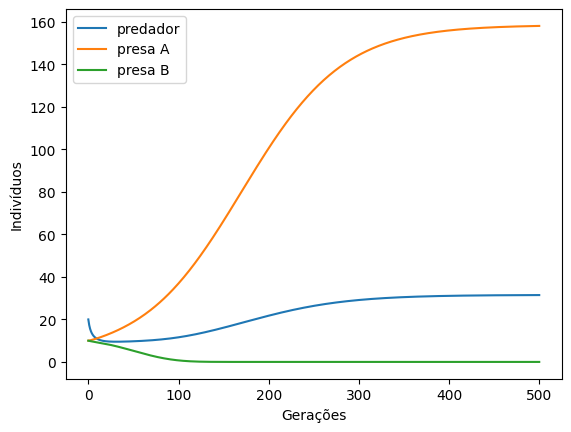

In [1]:
from matplotlib import pyplot as plt

# modelo com predação exclusiva e competição interespecífica entre duas presas
def interaction(p_n,growth_rate,support_capacity,a_n,a,b_n,b,sigma=0,gamma_1=0,gamma_2=0): 
    return p_n+growth_rate*p_n*(1-(p_n+sigma*a_n)/(support_capacity+gamma_1*a_n+gamma_2*b_n))+a*a_n*p_n+b*b_n*p_n

t=[0]
n = 500
for i in range (n):
    t.append(i+1)

def analisar(specie_1,specie_2,specie_3):
    for i in range (n):
        specie_1.append(interaction(specie_1[i],0.075,6,specie_2[i],0.002,specie_3[i],0.002,2.5e-4,2.5e-4))
        specie_2.append(interaction(specie_2[i],0.02,750,specie_3[i],-2e-4,specie_1[i],-5e-4,sigma=0.01))
        specie_3.append(interaction(specie_3[i],0.02,750,specie_2[i],-2e-3,specie_1[i],-5e-4,sigma=0.01))

# Analise
predator=[20] 
prey_1=[10] 
prey_2=[10] 

analisar(predator,prey_1,prey_2)

plt.plot(t,predator, label="predador")
plt.plot(t,prey_1,label="presa A")
plt.plot(t,prey_2, label="presa B")
plt.xlabel("Gerações")
plt.ylabel("Indivíduos")
plt.legend()
plt.show()